In [1]:
import matplotlib.pyplot as plt
import json
import math
import numpy as np
from numpy.polynomial.polynomial import Polynomial
from scipy.optimize import curve_fit

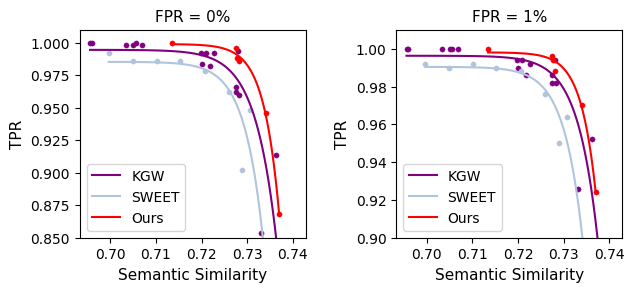

In [2]:
############ Figure 2 ############

def fivepl(x, a, b, c, d, g):
    return ( ( (a-d) / ( (1+( (x/c)** b )) **g) ) + d )
def expfunc(x, a, b, c):
    return -a*np.exp(b*x)+1

d_0 = {'sweet_0.25': [], '0.25': []}
d_1 = {'sweet_0.25': [], '0.25': []}
s = {'sweet_0.25': [], '0.25': []}
p = {'sweet_0.25': [], '0.25': []}

fig, ax = plt.subplots(1,2, figsize=(7, 2.7))
 
setting = 'setting_2'
gamma_list = ['0.25','sweet_0.25']
delta_list = {}

## PUT the delta here for each gamma
delta_list['0.25'] = ['0.8','1.0','1.1','1.2', '1.3','1.4','1.5', '1.6','1.7','1.8', '1.9','2.0', '2.3','2.4', '2.5','2.7', '2.9','3.0']
delta_list['sweet_0.25'] = ['1.0', '1.5', '1.75','2.0','2.25','2.5','2.75','3.0','3.5']

for gamma in gamma_list:
    cur_delta_list = delta_list[gamma] 
    for delta in cur_delta_list:
        entry = json.load(open(f"eval/opt/bs_test/half/{gamma}_{delta}.json"))
        thres_0 = entry[setting]['wm_bs']['z']['thres_0'] / 500
        thres_1 = entry[setting]['wm_bs']['z']['thres_1'] / 500
        simcse = entry[setting]['wm_bs']['simcse']
        ppl = math.log(entry[setting]['wm_bs']['ppl'])

        d_0[gamma].append(thres_0)
        d_1[gamma].append(thres_1)
        s[gamma].append(simcse)
        p[gamma].append(ppl)
# purple
colors = ['purple', 'lightsteelblue','yellowgreen', 'lightsalmon', 'darkorange','red']
dotcolors = ['plum', 'lightgreen', 'lightsteelblue','yellowgreen', 'lightsalmon', 'darkorange','salmon']
x_label_list = ['SimCSE (better →)', 'PPL (better →)']

th_list = [0,1]
x_list = [s, s]
y_list = [d_0, d_1]
ppl_list = [ppl,ppl]


for ax_id in range(2):
	for i in range(len(gamma_list)):
		gamma = gamma_list[i]
		ax[ax_id].scatter(x_list[ax_id][gamma], y_list[ax_id][gamma], s=15, color=colors[i], linewidths=0.15)
		popt, pcov = curve_fit(fivepl, x_list[ax_id][gamma], y_list[ax_id][gamma], maxfev=20000)
		x_fit = np.linspace(min(x_list[ax_id][gamma]), max(x_list[ax_id][gamma]), 100) 
		y_fit = fivepl(x_fit, *popt) 
		if 'sweet' in gamma:
			ax[ax_id].plot(x_fit, y_fit, color=colors[i], label="SWEET") 
		else:
			ax[ax_id].plot(x_fit, y_fit, color=colors[i], label="KGW")
		
	# ax[ax_id].grid()
	ax[ax_id].legend(loc="lower left")
	ax[ax_id].set_ylabel('TPR', fontsize=11)
	ax[ax_id].set_xlabel('Semantic Similarity', fontsize=11)
	ax[ax_id].set_title(f"FPR = {str(th_list[ax_id])}%", fontsize=11)

            
gamma_list = ['0.1','0.25', '0.25', '0.25','0.25','0.25']
delta_list = ['1.0','1.0','1.25','1.5','1.75','2.0']
ckpt_list = ['ckpt_600','ckpt_800','ckpt_900','ckpt_900','ckpt_800', 'ckpt_1200']

d = [[], []]
s, p = [], []
th_list = [0,1]
for i in range(len(gamma_list)):
    gamma, delta, ckpt = gamma_list[i], delta_list[i], ckpt_list[i]
    wm = json.load(open(f"eval/opt/wm_test/wm_test_{gamma}_{delta}_half.json"))[ckpt][setting]['wm']
    simcse = wm['simcse'] 
    ppl = math.log(wm['ppl']) 
    for j in range(len(th_list)):
        d[j].append(wm['z']['thres_'+str(th_list[j])] / 500)
    s.append(simcse)
    p.append(ppl)

x_list = [s, s]
y_list = d
for ax_id in range(2):
	ax[ax_id].scatter(x_list[ax_id], y_list[ax_id], color=colors[-1], s=15, linewidths=0.15)

	popt, pcov = curve_fit(fivepl, x_list[ax_id], y_list[ax_id], maxfev=20000)
	x_fit = np.linspace(min(x_list[ax_id]), max(x_list[ax_id]), 100) 
	y_fit = fivepl(x_fit, *popt)
	ax[ax_id].plot(x_fit, y_fit, color=colors[-1], label="Ours") 
	ax[ax_id].legend(loc="lower left") 

ax[0].set_ylim([0.85, 1.01])
ax[1].set_ylim([0.9, 1.01])

plt.subplots_adjust(wspace=0.4)  
plt.subplots_adjust(hspace=0.4) 
# plt.savefig("main.pdf", bbox_inches='tight')

/home/mingjia/miniconda3/envs/llm/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


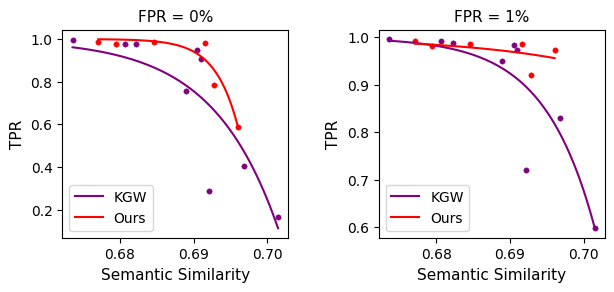

In [3]:
############ Figure 3 ############

def fivepl(x, a, b, c, d, g):
    return ( ( (a-d) / ( (1+( (x/c)** b )) **g) ) + d )
def expfunc(x, a, b, c):
    return -a*np.exp(b*x)+1

d_0 = {'0.25': []}
d_1 = {'0.25': []}
s = {'0.25': []}
p = {'0.25': []}

fig, ax = plt.subplots(1,2, figsize=(7, 2.7))
 
setting = 'setting_2'
gamma_list = ['0.25']
delta_list = {}

delta_list['0.25'] = ['0.8','0.9', '1.0',  '1.3','1.5','1.7', '2.0','2.3', '2.5']

for gamma in gamma_list:
    cur_delta_list = delta_list[gamma] 
    for delta in cur_delta_list:
        entry = json.load(open(f"eval/llama/bs_test/{gamma}_{delta}_llama.json"))
        thres_0 = entry[setting]['wm_bs']['z']['thres_0'] / 500
        thres_1 = entry[setting]['wm_bs']['z']['thres_1'] / 500
        simcse = entry[setting]['wm_bs']['simcse']

        d_0[gamma].append(thres_0)
        d_1[gamma].append(thres_1)
        s[gamma].append(simcse)

colors = ['purple', 'lightsteelblue','red']

th_list = [0,1]
x_list = [s, s]
y_list = [d_0, d_1]


for ax_id in range(2):
	for i in range(len(gamma_list)):
		gamma = gamma_list[i]
		ax[ax_id].scatter(x_list[ax_id][gamma], y_list[ax_id][gamma], s=15, color=colors[i], linewidths=0.3)
		
		popt, pcov = curve_fit(expfunc, x_list[ax_id][gamma], y_list[ax_id][gamma], maxfev=50000)
		x_fit = np.linspace(min(x_list[ax_id][gamma]), max(x_list[ax_id][gamma]), 100) 
		y_fit = expfunc(x_fit, *popt) 
		ax[ax_id].plot(x_fit, y_fit, color=colors[i], label="KGW")
		
	# ax[ax_id].grid()
	ax[ax_id].legend(loc="lower left")
	ax[ax_id].set_ylabel('TPR', fontsize=11)
	ax[ax_id].set_xlabel('Semantic Similarity', fontsize=11)
	ax[ax_id].set_title(f"FPR = {str(th_list[ax_id])}%", fontsize=11)

            
gamma_list = ['0.1', '0.25', '0.25', '0.25','0.25','0.25']
delta_list = ['1.0', '1.0','1.25','1.5','1.75', '2.0']

d = [[], []]
s, p = [], []
th_list = [0,1]
for i in range(6):
    gamma, delta = gamma_list[i], delta_list[i]
    wm = json.load(open(f"eval/llama/wm_test/{gamma}_{delta}.json"))[setting]['wm']
    simcse = wm['simcse'] 
    for j in range(len(th_list)):
        d[j].append(wm['z']['thres_'+str(th_list[j])] / 500)
    s.append(simcse)

x_list = [s, s]
y_list = d
for ax_id in range(2):
	ax[ax_id].scatter(x_list[ax_id], y_list[ax_id], color=colors[-1], s=15, linewidths=0.3)
	ax[ax_id].legend(loc="lower left")
         
	popt, pcov = curve_fit(expfunc, x_list[ax_id], y_list[ax_id], maxfev=40000)
	x_fit = np.linspace(min(x_list[ax_id]), max(x_list[ax_id]), 100) 
	y_fit = expfunc(x_fit, *popt)
	ax[ax_id].plot(x_fit, y_fit, color=colors[-1], label="Ours") 
	ax[ax_id].legend(loc="lower left") 

plt.subplots_adjust(wspace=0.4)  
plt.subplots_adjust(hspace=0.4) 
# plt.savefig("llama.pdf", bbox_inches='tight')

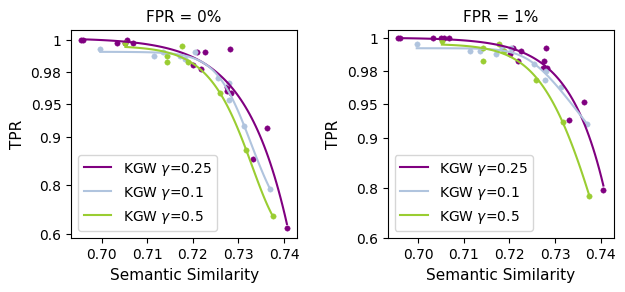

In [4]:
############ Figure 7 ############

def fivepl(x, a, b, c, d, g):
    return ( ( (a-d) / ( (1+( (x/c)** b )) **g) ) + d )
def expfunc(x, a, b, c):
    return -a*np.exp(b*x)+1

def transform_y(y):
    #return y
    if y <= 0.8:
        return (y-0.6) * 0.25 / 0.2
    elif y <= 0.9:
        return 0.25 + (y - 0.8) * 0.25 / 0.1
    elif y <= 0.95:
        return 0.5 + (y - 0.9) * (1/6) / 0.05
    elif y <= 0.98:
        return 2/3 + (y - 0.95) * (1/6) / 0.03
    else:
        return 5/6 + (y - 0.98) * (1/6) / 0.02

# Multinomial

d_0 = {'0.1': [], '0.25': [], '0.5': []}
d_1 = {'0.1': [], '0.25': [], '0.5': []}
s = {'0.1': [], '0.25': [], '0.5': []}
p = {'0.1': [], '0.25': [], '0.5': []}

fig, ax = plt.subplots(1,2, figsize=(7, 2.7))
 
setting = 'setting_2'
gamma_list = ['0.25', '0.1','0.5']
delta_list = {}

## PUT the delta here for each gamma
delta_list['0.25'] = ['0.8','1.0','1.1','1.2', '1.3','1.4','1.5', '1.6','1.7','1.8', '2.0', '2.3', '2.4', '2.5','2.7', '2.9','3.0']
delta_list['0.1'] = ['1.3','1.5', '1.7','1.8','1.9','2.0','2.1','2.2', '2.3','2.5','3.0' ] #,''2.0','2.3' #'0.8', '1.0', '1.3', '1.5', 
delta_list['0.5'] =  ['0.8','1.0','1.3','1.5','1.7','2.0', '2.3','3.0']

for gamma in gamma_list:
    cur_delta_list = delta_list[gamma] 
    for delta in cur_delta_list:
        entry = json.load(open(f"eval/opt/bs_test/half/{gamma}_{delta}.json"))
        thres_0 = transform_y(entry[setting]['wm_bs']['z']['thres_0'] / 500)
        thres_1 = transform_y(entry[setting]['wm_bs']['z']['thres_1'] / 500)
        simcse = entry[setting]['wm_bs']['simcse']
        ppl = math.log(entry[setting]['wm_bs']['ppl'])

        d_0[gamma].append(thres_0)
        d_1[gamma].append(thres_1)
        s[gamma].append(simcse)
        p[gamma].append(ppl)

colors = ['purple', 'lightsteelblue','yellowgreen', 'lightsalmon', 'darkorange','red']
x_label_list = ['SimCSE (better →)', 'PPL (better →)']

th_list = [0,1]
x_list = [s, s]
y_list = [d_0, d_1]
ppl_list = [ppl,ppl]

y_ticks = [0, 0.25, 0.5, 2/3, 5/6, 1]
y_tick_labels = ['0.6', '0.8', '0.9', '0.95', '0.98', '1']

for ax_id in range(2):
	for i in range(len(gamma_list)):
		gamma = gamma_list[i]
		ax[ax_id].scatter(x_list[ax_id][gamma], y_list[ax_id][gamma], s=15, color=colors[i], linewidths=0.3)
		
		popt, pcov = curve_fit(fivepl, x_list[ax_id][gamma], y_list[ax_id][gamma], maxfev=20000)
		x_fit = np.linspace(min(x_list[ax_id][gamma]), max(x_list[ax_id][gamma]), 100) 
		y_fit = fivepl(x_fit, *popt) 
		if 'entr' in gamma:
			ax[ax_id].plot(x_fit, y_fit, color=colors[i], label="SWEET") 
		else:
			ax[ax_id].plot(x_fit, y_fit, color=colors[i], label="KGW "+r'$\gamma$='+gamma)
		
	# ax[ax_id].grid()
	ax[ax_id].legend(loc="lower left")
	ax[ax_id].set_ylabel('TPR', fontsize=11)
	ax[ax_id].set_xlabel('Semantic Similarity', fontsize=11)
	ax[ax_id].set_title(f"FPR = {str(th_list[ax_id])}%", fontsize=11)
	ax[ax_id].set_yticks(y_ticks)
	ax[ax_id].set_yticklabels(y_tick_labels)

plt.subplots_adjust(wspace=0.4)  
plt.subplots_adjust(hspace=0.4) 
# plt.savefig("kgw.pdf", bbox_inches='tight')

/tmp/ipykernel_1557748/1733580208.py:4: RuntimeWarning: invalid value encountered in power
  return ( ( (a-d) / ( (1+( (x/c)** b )) **g) ) + d )


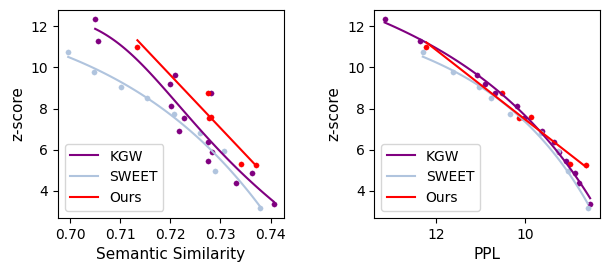

In [7]:
############ Figure 8 ############

def fivepl(x, a, b, c, d, g):
    return ( ( (a-d) / ( (1+( (x/c)** b )) **g) ) + d )
def expfunc(x, a, b, c):
    return -a*np.exp(b*x)+c

d_0 = {'sweet_0.25': [], '0.25': []}
d_1 = {'sweet_0.25': [], '0.25': []}
s = {'sweet_0.25': [], '0.25': []}
p = {'sweet_0.25': [], '0.25': []}
z = {'sweet_0.25': [], '0.25': []}

fig, ax = plt.subplots(1,2, figsize=(7, 2.7))
 
setting = 'setting_2'
gamma_list = ['0.25','sweet_0.25']
delta_list = {}

## PUT the delta here for each gamma
delta_list['0.25'] = ['0.8','1.0','1.1','1.2', '1.3','1.4','1.5', '1.6','1.7','1.8', '1.9','2.0', '2.3', '2.5']
delta_list['sweet_0.25'] = ['1.0', '1.5', '1.75','2.0','2.25','2.5','2.75','3.0','3.5']

for gamma in gamma_list:
    cur_delta_list = delta_list[gamma] 
    for delta in cur_delta_list:
        entry = json.load(open(f"eval/opt/bs_test/half/{gamma}_{delta}.json"))
        thres_0 = entry[setting]['wm_bs']['z']['thres_0'] / 500
        thres_1 = entry[setting]['wm_bs']['z']['thres_1'] / 500
        z_avg = entry[setting]['wm_bs']['z']['avg'] 
        simcse = entry[setting]['wm_bs']['simcse']
        ppl = entry[setting]['wm_bs']['ppl'] # math.log(entry[setting]['wm_bs']['ppl'])

        d_0[gamma].append(thres_0)
        d_1[gamma].append(thres_1)
        s[gamma].append(simcse)
        p[gamma].append(ppl)
        z[gamma].append(z_avg)
# purple
colors = ['purple', 'lightsteelblue','yellowgreen', 'lightsalmon', 'darkorange','red']
dotcolors = ['plum', 'lightgreen', 'lightsteelblue','yellowgreen', 'lightsalmon', 'darkorange','salmon']
x_label_list = ['SimCSE (better →)', 'PPL (better →)']

y_list = [z,z]
x_list = [s, p]

for ax_id in range(2):
	for i in range(len(gamma_list)):
		gamma = gamma_list[i]
		ax[ax_id].scatter(x_list[ax_id][gamma], y_list[ax_id][gamma], s=15, color=colors[i], linewidths=0.15)
		popt, pcov = curve_fit(fivepl, x_list[ax_id][gamma], y_list[ax_id][gamma], maxfev=20000)
		x_fit = np.linspace(min(x_list[ax_id][gamma]), max(x_list[ax_id][gamma]), 100) 
		y_fit = fivepl(x_fit, *popt) 
		if 'sweet' in gamma:
			ax[ax_id].plot(x_fit, y_fit, color=colors[i], label="SWEET") 
		else:
			ax[ax_id].plot(x_fit, y_fit, color=colors[i], label="KGW")
		
	# ax[ax_id].grid()
	ax[ax_id].legend(loc="lower left")
	ax[ax_id].set_ylabel('z-score', fontsize=11)
	
ax[0].set_xlabel('Semantic Similarity', fontsize=11)
ax[1].set_xlabel('PPL', fontsize=11)
	# ax[ax_id].set_title(f"FPR = {str(th_list[ax_id])}%", fontsize=11)

            
gamma_list = ['0.1','0.25', '0.25', '0.25','0.25','0.25']
delta_list = ['1.0','1.0','1.25','1.5','1.75','2.0']
ckpt_list = ['ckpt_600','ckpt_800','ckpt_900','ckpt_900','ckpt_800', 'ckpt_1200']

d = [[], [], [], []]
z = []
s, p = [], []
th_list = [0,1,5,10]
# for ax_id in range(4):
for i in range(len(gamma_list)):
    gamma, delta, ckpt = gamma_list[i], delta_list[i], ckpt_list[i]
    wm = json.load(open(f"eval/opt/wm_test/wm_test_{gamma}_{delta}_half.json"))[ckpt][setting]['wm']
    simcse = wm['simcse'] 
    ppl = wm['ppl'] #math.log(wm['ppl']) 
    for j in range(len(th_list)):
        d[j].append(wm['z']['thres_'+str(th_list[j])] / 500)
    z.append(wm['z']['avg'])
    s.append(simcse)
    p.append(ppl)

x_list = [s, p]
y_list = [z, z]
for ax_id in range(2):
	ax[ax_id].scatter(x_list[ax_id], y_list[ax_id], color=colors[-1], s=15, linewidths=0.15)

	popt, pcov = curve_fit(expfunc, x_list[ax_id], y_list[ax_id], maxfev=20000)
	x_fit = np.linspace(min(x_list[ax_id]), max(x_list[ax_id]), 100) 
	y_fit = expfunc(x_fit, *popt)
	ax[ax_id].plot(x_fit, y_fit, color=colors[-1], label="Ours") 
	ax[ax_id].legend(loc="lower left") 

ax[1].invert_xaxis()

plt.subplots_adjust(wspace=0.4)  
plt.subplots_adjust(hspace=0.4) 
# plt.savefig("z-score.pdf", bbox_inches='tight')

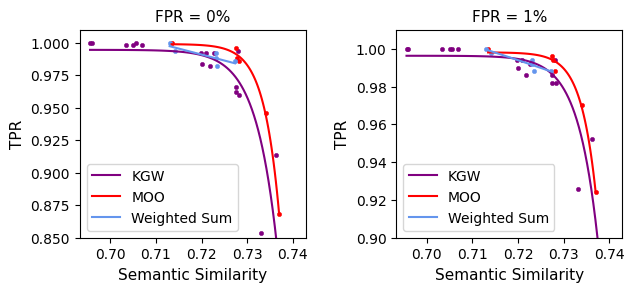

In [6]:
############ Figure 9 ############

def fivepl(x, a, b, c, d, g):
    return ( ( (a-d) / ( (1+( (x/c)** b )) **g) ) + d )
def expfunc(x, a, b, c):
    return -a*np.exp(b*x)+c

# Multinomial
d_0 = {'0.25': []}
d_1 = {'0.25': []}
s = {'0.25': []}
p = {'0.25': []}

fig, ax = plt.subplots(1,2, figsize=(7, 2.7))
 
setting = 'setting_2'
gamma_list = ['0.25']
delta_list = {}

## PUT the delta here for each gamma
delta_list['0.25'] = ['0.8','1.0','1.1','1.2', '1.3','1.4','1.5', '1.6','1.7','1.8', '1.9','2.0', '2.3', '2.4', '2.5','2.7', '2.9','3.0']

for gamma in gamma_list:
    cur_delta_list = delta_list[gamma] 
    for delta in cur_delta_list:
        entry = json.load(open(f"eval/opt/bs_test/half/{gamma}_{delta}.json"))
        thres_0 = entry[setting]['wm_bs']['z']['thres_0'] / 500
        thres_1 = entry[setting]['wm_bs']['z']['thres_1'] / 500
        simcse = entry[setting]['wm_bs']['simcse']
        ppl = math.log(entry[setting]['wm_bs']['ppl'])

        d_0[gamma].append(thres_0)
        d_1[gamma].append(thres_1)
        s[gamma].append(simcse)
        p[gamma].append(ppl)

colors = ['purple', 'blue','lightsteelblue', 'lavender','lightpink', 'darkorange','red']
x_label_list = ['SimCSE (better →)', 'PPL (better →)']

th_list = [0,1]
x_list = [s, s]
y_list = [d_0, d_1]
ppl_list = [ppl,ppl]


for ax_id in range(2):
	for i in range(len(gamma_list)):
		gamma = gamma_list[i]
		ax[ax_id].scatter(x_list[ax_id][gamma], y_list[ax_id][gamma], color=colors[i], s=10, linewidths=0.3)
		
		popt, pcov = curve_fit(fivepl, x_list[ax_id][gamma], y_list[ax_id][gamma], maxfev=20000)
		x_fit = np.linspace(min(x_list[ax_id][gamma]), max(x_list[ax_id][gamma]), 100) 
		y_fit = fivepl(x_fit, *popt) 
		if 'entr' in gamma:
			ax[ax_id].plot(x_fit, y_fit, color=colors[i], label="SWEET") 
		else:
			ax[ax_id].plot(x_fit, y_fit, color=colors[i], label="KGW")
		
	# ax[ax_id].grid()
	ax[ax_id].legend(loc="lower left")
	ax[ax_id].set_ylabel('TPR', fontsize=11)
	ax[ax_id].set_xlabel('Semantic Similarity', fontsize=11)
	ax[ax_id].set_title(f"FPR = {str(th_list[ax_id])}%", fontsize=11)

gamma_list = ['0.1','0.25', '0.25', '0.25','0.25','0.25']
delta_list = ['1.0','1.0','1.25','1.5','1.75','2.0']
ckpt_list = ['ckpt_600','ckpt_800','ckpt_900','ckpt_900','ckpt_800', 'ckpt_1200']

d = [[], []]
s, p = [], []
th_list = [0,1]
for i in range(len(gamma_list)):
    gamma, delta, ckpt = gamma_list[i], delta_list[i], ckpt_list[i]
    wm = json.load(open(f"eval/opt/wm_test/wm_test_{gamma}_{delta}_half.json"))[ckpt][setting]['wm']
    simcse = wm['simcse'] 
    ppl = math.log(wm['ppl']) 
    for j in range(len(th_list)):
        d[j].append(wm['z']['thres_'+str(th_list[j])] / 500)
    s.append(simcse)
    p.append(ppl)

x_list = [s, s]
y_list = d
for ax_id in range(2):
	ax[ax_id].scatter(x_list[ax_id], y_list[ax_id], color=colors[-1], s=10, linewidths=0.3)
	popt, pcov = curve_fit(fivepl, x_list[ax_id], y_list[ax_id], maxfev=20000)
	x_fit = np.linspace(min(x_list[ax_id]), max(x_list[ax_id]), 100) 
	y_fit = fivepl(x_fit, *popt)
	ax[ax_id].plot(x_fit, y_fit, color=colors[-1], label="MOO") 
	ax[ax_id].legend(loc="lower left") 
            

gamma_list = ['0.25','0.25', '0.25', '0.25','0.25','0.25']
delta_list = ['0.75','1.0','1.25','1.5','1.75','2.0']

d = [[], []]
s, p = [], []
th_list = [0,1]
for i in range(6):
    gamma, delta = gamma_list[i], delta_list[i]
    wm = json.load(open(f"eval/opt/weighted_sum_test/wm_{gamma}_{delta}.json"))[setting]['wm']
    simcse = wm['simcse'] 
    for j in range(len(th_list)):
        d[j].append(wm['z']['thres_'+str(th_list[j])] / 500)
    s.append(simcse)
    p.append(ppl)

x_list = [s, s]
y_list = d
c_w = 'cornflowerblue'
for ax_id in range(2):
	ax[ax_id].scatter(x_list[ax_id], y_list[ax_id], color=c_w, s=10, linewidths=0.3)
	popt, pcov = curve_fit(expfunc, x_list[ax_id], y_list[ax_id], maxfev=20000)
	x_fit = np.linspace(min(x_list[ax_id]), max(x_list[ax_id]), 100) 
	y_fit = expfunc(x_fit, *popt)
	ax[ax_id].plot(x_fit, y_fit, label="Weighted Sum", color=c_w) 
	ax[ax_id].legend(loc="lower left") 
    
ax[0].set_ylim([0.85, 1.01])
ax[1].set_ylim([0.9, 1.01])

plt.subplots_adjust(wspace=0.4)  
plt.subplots_adjust(hspace=0.4) 
# plt.savefig("weighted.pdf", bbox_inches='tight')